# 《绝地求生》玩家排名预测
                   ---- 你能预测《绝地求生》玩家战斗结束后的排名吗？


![img1](./img/img1.png)

# 项目背景
## 项目简介
绝地求生(Player unknown's Battlegrounds)，俗称吃鸡，是一款战术竞技型射击类沙盒游戏。
这款游戏是一款大逃杀类型的游戏，每一局游戏将有最多100名玩家参与，他们将被投放在绝地岛(battlegrounds)上，在游戏的开始时所有人都一无所有。玩家需要在岛上收集各种资源，在不断缩小的安全区域内对抗其他玩家，让自己生存到最后。

该游戏拥有很高的自由度，玩家可以体验飞机跳伞、开越野车、丛林射击、抢夺战利品等玩法，小心四周埋伏的敌人，尽可能成为最后1个存活的人。


![img2](./img/img2.png)

## 项目涉及知识点
 - sklearn基本操作
 - 数据基本处理
 - 机器学习基本算法的使用


## 数据集介绍
本项目中，将为您提供大量匿名的《绝地求生》游戏统计数据。
其格式为每行包含一个玩家的游戏后统计数据，列为数据的特征值。
数据来自所有类型的比赛：单排，双排，四排；不保证每场比赛有100名人员，每组最多4名成员。

文件说明:

- train_V2.csv - 训练集

- test_V2.csv - 测试集


数据集局部图如下图所示:

![img3](./img/img3.png)

数据集中字段解释：

# 项目评估方式
## 评估方式
你必须创建一个模型，根据他们的最终统计数据预测玩家的排名，从1（第一名）到0（最后一名）。

最后结果通过平均绝对误差（MAE）进行评估，即通过预测的winPlacePerc和真实的winPlacePerc之间的平均绝对误差

## MAE(Mean Absolute Error)介绍
 - 就是绝对误差的平均值
 - 能更好地反映预测值误差的实际情况
     $$ MAE(X,h) = \frac{1}{m} \sum_{i=1}^{m} {|h(x^{(i)}) - y^{(i)}|}$$
 
api:
 - sklearn.metrics.mean_absolute_error

# 项目实现（数据分析+RF+lightGBM）
在接下来的分析中，我们将分析数据集，检测异常值。

然后我们通过随机森林模型对其训练，并对对该模型进行了优化。

In [3]:
# 导入数据基本处理阶段需要用到的api
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 获取数据、基本数据信息查看
导入数据，且查看数据的基本信息

In [4]:
train = pd.read_csv("./data/train_V2.csv")

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [7]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

可以看到数据一共有4446966条，

In [9]:
train.shape

(4446966, 29)

In [10]:
# 查看一共有多少场比赛
np.unique(train["matchId"]).shape

(47965,)

In [11]:
# 查看一共有多少组
np.unique(train["groupId"]).shape

(2026745,)

## 数据基本处理
### 数据缺失值处理
查看目标值，我们发现有一条样本，比较特殊，其“winplaceperc”的值为NaN，也就是目标值是缺失值，

因为只有一个玩家是这样，直接进行删除处理。

In [12]:
# 查看缺失值
# np.any(train.isnull())
# 通过上面方法查看,发现只有"'winPlacePerc"列有缺失值;

# 寻找缺失值行
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [13]:
# 删除缺失值
train.drop(2744604, inplace=True)

In [14]:
train.shape

(4446965, 29)

### 特征数据规范化处理
#### 查看每场比赛参加的人数
处理完缺失值之后，我们看一下每场参加的人数会有多少呢，是每次都会匹配100个人，才开始游戏吗？

In [15]:
# 显示每场比赛参加人数
# transform的作用类似实现了一个一对多的映射功能，把统计数量映射到对应的每个样本上
count = train.groupby('matchId')['matchId'].transform('count')

In [16]:
train['playersJoined'] = count

In [17]:
count.count()

4446965

In [18]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [19]:
# 通过每场参加人数进行，按值升序排列
train["playersJoined"].sort_values().head()

1206365    2
2109739    2
3956552    5
3620228    5
696000     5
Name: playersJoined, dtype: int64

通过结果发现，最少的一局，竟然只有两个人，wtf!!!!

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


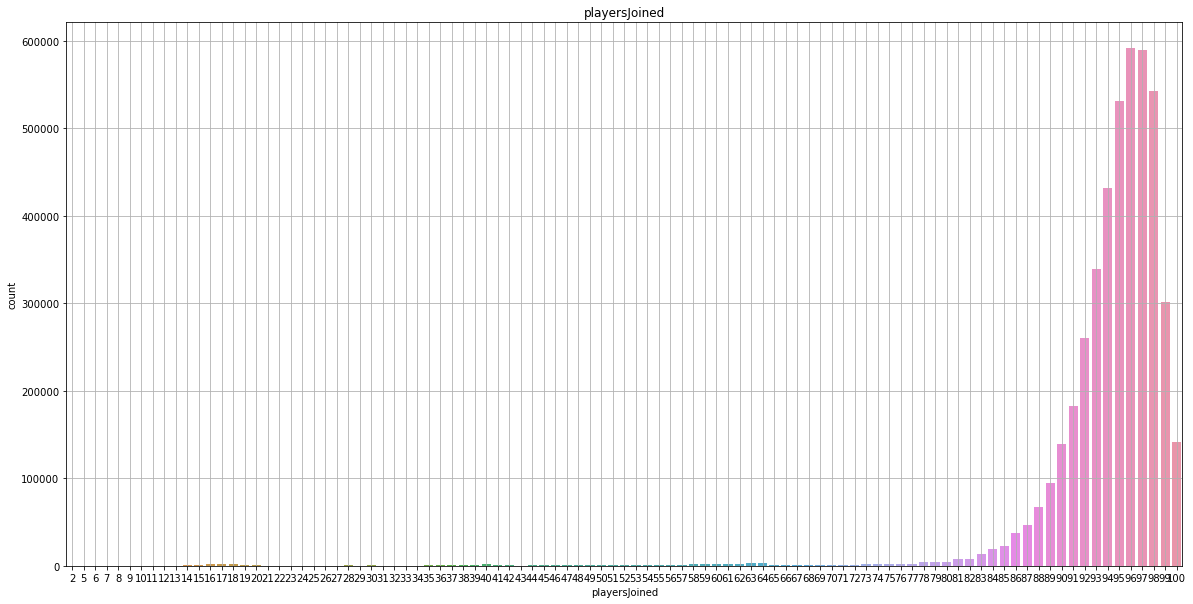

In [20]:
# 通过绘制图像，查看每局开始人数
# 通过seaborn下的countplot方法，可以直接绘制统计过数量之后的直方图
plt.figure(figsize=(20,10))
sns.countplot(train['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

通过观察，发现一局游戏少于75个玩家，就开始的还是比较少

同时大部分游戏都是在接近100人的时候才开始

限制每局开始人数大于等于75，再进行绘制。

猜想：把这些数据在后期加入数据处理，应该会得到的结果更加准确一些

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


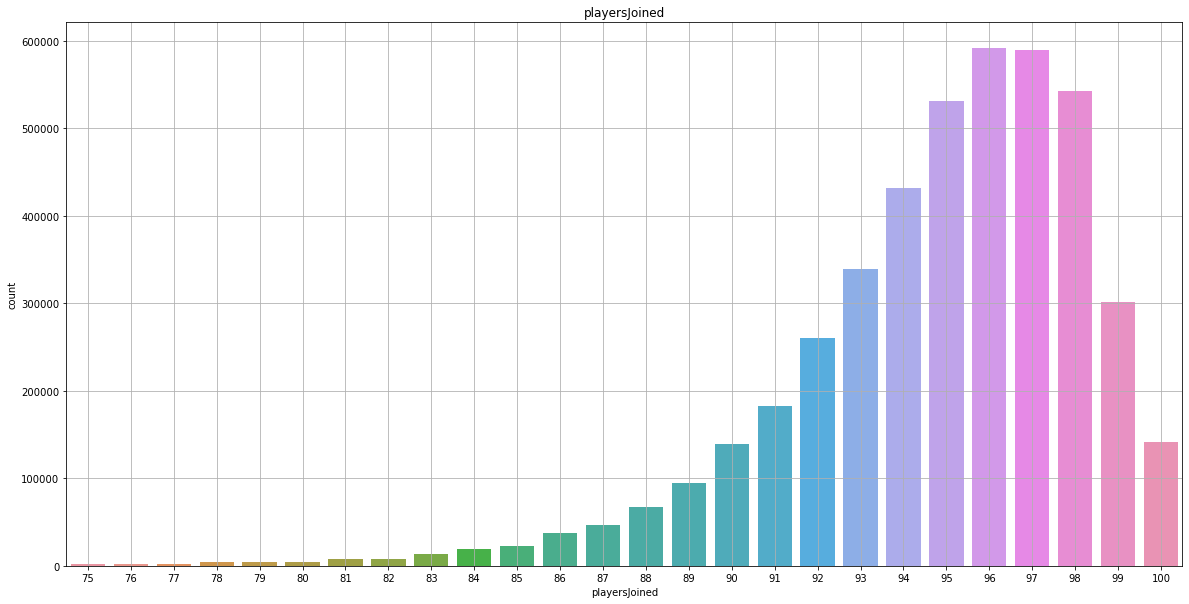

In [21]:
# 再次绘制每局参加人数的直方图
plt.figure(figsize=(20,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

#### 规范化输出部分数据

现在我们统计了“每局玩家数量”，那么我们就可以通过“每局玩家数量”来进一步考证其它特征，同时对其规范化设置

试想：一局只有70个玩家的杀敌数，和一局有100个玩家的杀敌数，应该是不可以同时比较的

可以考虑的特征值包括
 - 1.kills（杀敌数）

 - 2.damageDealt（总伤害）

 - 3.maxPlace（本局最差名次）

 - 4.matchDuration（比赛时长）

In [22]:
# 对部分特征值进行规范化
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)

In [23]:
# 比较经过规范化的特征值和原始特征值的值
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


### 部分变量合成
此处我们把特征：heals(使用治疗药品数量)和boosts(能量、道具使用数量)合并成一个新的变量，命名：”healsandboosts“， 这是一个探索性过程，最后结果不一定有用，如果没有实际用处，最后再把它删除。

In [24]:
# 创建新变量“healsandboosts”
train['healsandboosts'] = train['heals'] + train['boosts']

In [25]:
train[["heals", "boosts", "healsandboosts"]].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


### 异常值处理
#### 异常值处理：删除有击杀，但是完全没有移动的玩家
异常数据处理：

一些行中的数据统计出来的结果非常反常规，那么这些玩家肯定有问题，为了训练模型的准确性，我们会把这些异常数据剔除

通过以下操作，识别出玩家在游戏中有击杀数，但是全局没有移动；

这类型玩家肯定是存在异常情况（挂**），我们把这些玩家删除。

In [26]:
# 创建新变量，统计玩家移动距离
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# 创建新变量，统计玩家是否在游戏中，有击杀，但是没有移动，如果是返回True, 否则返回false
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [27]:
train["killsWithoutMoving"].head()

0    False
1    False
2    False
3    False
4    False
Name: killsWithoutMoving, dtype: bool

In [28]:
train["killsWithoutMoving"].describe()

count     4446965
unique          2
top         False
freq      4445430
Name: killsWithoutMoving, dtype: object

In [29]:
# 检查是否存在有击杀但是没有移动的数据
train[train['killsWithoutMoving'] == True].shape

(1535, 37)

In [30]:
train[train['killsWithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0,0.8571,58,8.52,842.060,21.30,842.06,3,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0,0.6000,42,4.74,547.628,17.38,2834.52,6,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0,0.8947,21,35.80,3132.500,35.80,1607.42,5,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,1500,0.0000,73,1.27,200.406,24.13,1014.73,0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0,0.3000,42,1.58,158.000,17.38,2834.52,0,0.0,True


In [31]:
# 删除这些数据
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [32]:
train.shape

(4445430, 37)

#### 异常值处理：删除驾车杀敌数异常的数据

In [33]:
# 查看载具杀敌数超过十个的玩家
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1568,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,1606,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000,False


In [34]:
# 删除这些数据
train.drop(train[train['roadKills'] > 10].index, inplace=True)

In [35]:
train.shape

(4445426, 37)

#### 异常值处理：删除玩家在一局中杀敌数超过30人的数据

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


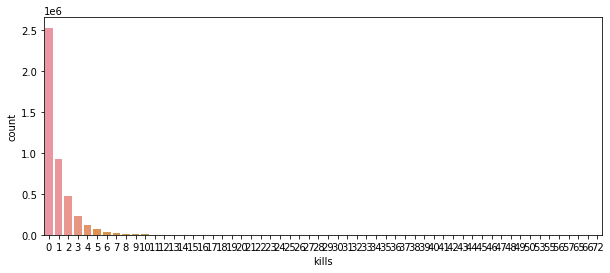

In [36]:
# 首先绘制玩家杀敌数的条形图
plt.figure(figsize=(10,4))
sns.countplot(train["kills"])
plt.show()

In [37]:
train[train['kills'] > 30].shape

(95, 37)

In [38]:
train[train['kills'] > 30].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1500,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False


In [39]:
# 异常数据删除
train.drop(train[train['kills'] > 30].index, inplace=True)

#### 异常值处理：删除爆头率异常数据
如果一个玩家的击杀爆头率过高，也说明其有问题

In [40]:
# 创建变量爆头率
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [41]:
train["headshot_rate"].tail()

4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, dtype: float64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


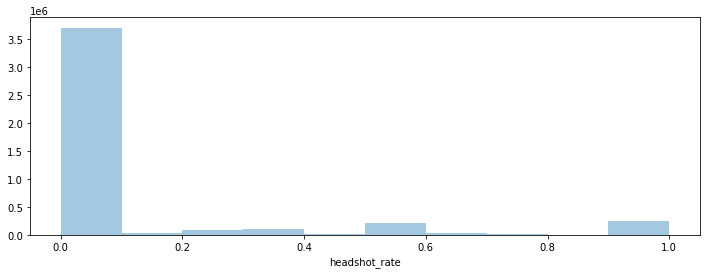

In [42]:
# 绘制爆头率图像
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10, kde=False)
plt.show()

In [43]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape

(24, 38)

In [44]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0


In [45]:
train.drop(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].index, inplace=True)

#### 异常值处理：删除最远杀敌距离异常数据

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


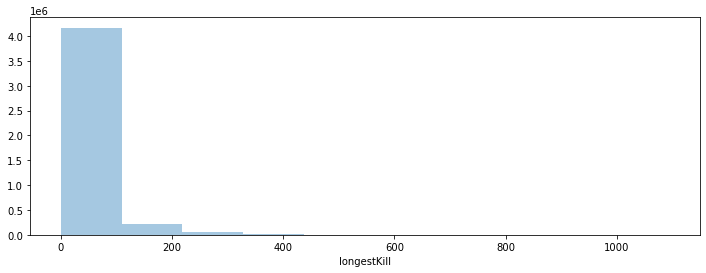

In [46]:
# 绘制图像
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10, kde=False)
plt.show()

In [47]:
# 找出最远杀敌距离大于等于1km的玩家
train[train['longestKill'] >= 1000].shape

(20, 38)

In [48]:
train[train['longestKill'] >= 1000]["longestKill"].head()

202281    1000.0
240005    1004.0
324313    1026.0
656553    1000.0
803632    1075.0
Name: longestKill, dtype: float64

In [49]:
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

In [50]:
train.shape

(4445287, 38)

#### 异常值处理：删除关于运动距离的异常值

In [51]:
# 距离整体描述
train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445287e+06,4.445287e+06,4.445287e+06,4.445287e+06
mean,1.154619e+03,6.063215e+02,4.510898e+00,1.765451e+03
std,1.183508e+03,1.498562e+03,3.050738e+01,2.183248e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.863000e+02,0.000000e+00,0.000000e+00,7.892500e+02
75%,1.977000e+03,2.566000e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


##### a）行走距离处理

In [52]:
train[train['walkDistance'] >= 10000].shape

(219, 38)

In [53]:
train[train['walkDistance'] >= 10000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,0.0000,99.99,1925.06,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,31.3470,27.00,2668.95,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,124.2320,49.82,2323.52,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,33.6336,50.96,1909.44,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.8116,92.71,2293.62,4,11490.6300,False,0.0


In [54]:
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

#####  b）载具行驶距离处理

In [55]:
train[train['rideDistance'] >= 20000].shape

(150, 38)

In [56]:
train[train['rideDistance'] >= 20000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.2,0,0,1,30,...,0.6421,96,1.04,103.168,99.84,1969.76,1,26306.6,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.0,0,0,0,55,...,0.5376,94,0.00,0.000,99.64,2004.46,0,22065.4,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.0,0,0,0,26,...,0.8878,99,1.01,101.000,99.99,1947.28,0,28917.5,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.0,0,0,0,46,...,0.7917,97,0.00,0.000,99.91,1861.21,0,21197.2,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.2,0,1,2,2,...,0.9785,94,7.42,824.892,99.64,1986.44,9,26733.2,False,0.142857


In [57]:
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)

##### c）游泳距离处理

In [58]:
train[train['swimDistance'] >= 2000].shape

(12, 38)

In [59]:
train[train['swimDistance'] >= 2000][["swimDistance"]]

,swimDistance
177973,2295.0
274258,2148.0
1005337,2718.0
1195818,2668.0
1227362,3823.0
1889163,2484.0
2065940,3514.0
2327586,2387.0
2784855,2206.0
3359439,2338.0


In [60]:
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

#### 异常值处理：武器收集异常值处理

In [61]:
train[train['weaponsAcquired'] >= 80].shape

(19, 38)

In [62]:
train[train['weaponsAcquired'] >= 80][['weaponsAcquired']].head()

,weaponsAcquired
233643,128
588387,80
1437471,102
1449293,95
1592744,94


In [63]:
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

#### 异常值处理：删除使用治疗药品数量异常值

In [64]:
train[train['heals'] >= 40].shape

(135, 38)

In [65]:
train[train['heals'] >= 40][["heals"]].head()

,heals
18405,47
54463,43
126439,52
259351,42
268747,48


In [66]:
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [67]:
train.shape

(4444752, 38)

### 类别型数据处理
#### 比赛类型one-hot处理

In [68]:
# 关于比赛类型，共有16种方式
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [69]:
# 对matchType进行one_hot编码
# 通过在后面添加的方式,实现,赋值并不是替换
train = pd.get_dummies(train, columns=['matchType'])

In [70]:
train.shape

(4444752, 53)

In [71]:
# 通过正则匹配查看具体内容
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### 对groupId,matchId等数据进行处理
关于groupId,matchId这类型数据，也是类别型数据。但是它们的数据量特别多，如果你使用one-hot编码，无异于自杀。

在这儿我们把它们变成用数字统计的类别型数据依旧不影响我们正常使用。

In [72]:
# 把groupId 和 match Id 转换成类别类型 categorical types
# 就是把一堆不怎么好识别的内容转换成数字

# 转换group_id
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: object

In [73]:
train['groupId'] = train['groupId'].astype('category')

In [74]:
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: category
Categories (2026153, object): ['00000c08b5be36', '00000d1cbbc340', '000025a09dd1d7', '000038ec4dff53', ..., 'fffff305a0133d', 'fffff32bc7eab9', 'fffff7edfc4050', 'fffff98178ef52']

In [75]:
train["groupId_cat"] = train["groupId"].cat.codes

In [76]:
train["groupId_cat"].head()

0     613591
1     827580
2     843271
3    1340070
4    1757334
Name: groupId_cat, dtype: int32

In [77]:
# 转换match_id
train['matchId'] = train['matchId'].astype('category')

train['matchId_cat'] = train['matchId'].cat.codes


In [78]:
# 删除之前列
train.drop(['groupId', 'matchId'], axis=1, inplace=True)

# 查看新产生列
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613591,30085
1,827580,32751
2,843271,3143
3,1340070,45260
4,1757334,20531


In [79]:
train.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,0,0,0,0,0,0,0,1,613591,30085
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,0,0,0,0,0,0,0,1,827580,32751
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,843271,3143
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,0,0,0,0,0,0,0,1,1340070,45260
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,0,0,0,0,0,1,0,0,1757334,20531


### 数据截取
#### 取部分数据进行使用（1000000）

In [80]:
# 取前100万条数据，进行训练
sample = 1000000
df_sample = train.sample(sample)

In [81]:
df_sample.shape

(1000000, 53)

### 确定特征值和目标值

In [82]:
# 确定特征值和目标值
df = df_sample.drop(["winPlacePerc", "Id"], axis=1) #all columns except target

y = df_sample['winPlacePerc'] # Only target variable

In [83]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
659712,0,1,164.20,1,0,0,30,0,1,1,...,0,0,0,0,0,0,0,0,856022,41974
1612721,0,1,82.62,1,0,6,17,0,2,2,...,0,0,0,0,0,0,1,0,1844654,10248
2931730,0,0,0.00,0,0,0,83,1312,0,0,...,0,0,0,0,0,0,0,0,1653203,11103
2119998,0,0,31.88,0,0,0,51,1202,0,0,...,0,0,0,0,0,1,0,0,509495,26903
4272727,0,0,43.00,0,0,0,80,0,0,0,...,0,0,0,0,0,0,0,0,548743,44570


In [84]:
y.head()

659712     0.4694
1612721    0.0400
2931730    0.1064
2119998    0.6667
4272727    0.1087
Name: winPlacePerc, dtype: float64

In [85]:
print(df.shape, y.shape)

(1000000, 51) (1000000,)


### 分割训练集和测试集

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2)

## 机器学习（模型训练）和评估

In [87]:
# 导入需要训练和评估api
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### 使用随机森林对模型进行训练
#### 初步使用随机森林进行模型训练

In [88]:
# 模型训练
m1 = RandomForestRegressor(n_estimators=40, 
                           min_samples_leaf=3, 
                           max_features='sqrt',
                           n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [89]:
y_pre = m1.predict(X_valid)
m1.score(X_valid, y_valid)

0.920424000026034

In [90]:
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

0.06153910787522253

经过第一次计算，得出准确率为：0.92， mae=0.061

#### 再次使用随机森林，进行模型训练
减少特征值，提高模型训练效率

In [91]:
# 查看特征值在当前模型中的重要程度
m1.feature_importances_

array([3.44382441e-03, 9.39568932e-02, 1.07359840e-02, 5.28437120e-03,
       7.12088176e-04, 3.85909862e-02, 2.06284659e-01, 1.97544803e-03,
       1.03794125e-02, 3.32306821e-03, 2.14655978e-02, 1.07709461e-02,
       6.79271680e-03, 7.02852961e-03, 3.46382840e-03, 1.11626760e-03,
       1.12073030e-02, 3.81974149e-05, 2.55192942e-03, 1.13948613e-04,
       2.25623333e-05, 2.08109499e-01, 5.62195963e-02, 2.33716831e-03,
       6.72459144e-03, 1.23379417e-02, 1.45603232e-02, 7.15074107e-03,
       1.14887651e-02, 4.54066376e-02, 1.82953875e-01, 0.00000000e+00,
       7.86425970e-04, 4.94942483e-05, 1.77003979e-07, 2.09416669e-04,
       4.91284890e-04, 2.34858170e-07, 1.66211621e-06, 1.72857560e-07,
       7.72240338e-05, 4.75247537e-07, 1.19774559e-05, 2.27331444e-06,
       2.53951163e-04, 2.17356649e-04, 1.14637782e-03, 1.10142285e-03,
       9.01161023e-04, 4.09427238e-03, 4.10693930e-03])

In [92]:
imp_df = pd.DataFrame({"cols":df.columns, "imp":m1.feature_importances_})

In [93]:
imp_df.head()

,cols,imp
0,assists,0.003444
1,boosts,0.093957
2,damageDealt,0.010736
3,DBNOs,0.005284
4,headshotKills,0.000712


In [94]:
imp_df = imp_df.sort_values("imp", ascending=False)

In [95]:
imp_df.head()

,cols,imp
21,walkDistance,0.208109
6,killPlace,0.206285
30,totalDistance,0.182954
1,boosts,0.093957
22,weaponsAcquired,0.056220


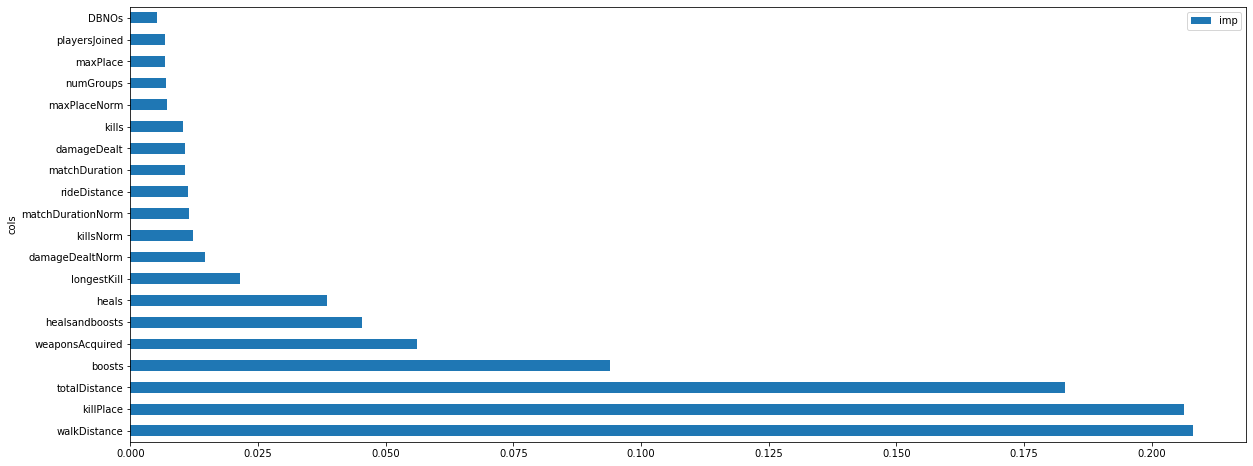

In [96]:
# 绘制特征重要性程度图，仅展示排名前二十的特征
imp_df[:20].plot('cols', 'imp', figsize=(20,8), kind = 'barh')
plt.show()

In [97]:
# 保留比较重要的特征
to_keep = imp_df[imp_df.imp>0.005].cols
print('Significant features: ', len(to_keep))

to_keep

Significant features:  20


21         walkDistance
6             killPlace
30        totalDistance
1                boosts
22      weaponsAcquired
29       healsandboosts
5                 heals
10          longestKill
26      damageDealtNorm
25            killsNorm
28    matchDurationNorm
16         rideDistance
11        matchDuration
2           damageDealt
8                 kills
27         maxPlaceNorm
13            numGroups
12             maxPlace
24        playersJoined
3                 DBNOs
Name: cols, dtype: object

In [98]:
# 由这些比较重要的特征值，生成新的df
df[to_keep].head()

,walkDistance,killPlace,totalDistance,boosts,weaponsAcquired,healsandboosts,heals,longestKill,damageDealtNorm,killsNorm,matchDurationNorm,rideDistance,matchDuration,damageDealt,kills,maxPlaceNorm,numGroups,maxPlace,playersJoined,DBNOs
659712,845.6,30,1383.5,1,7,1,0,35.090,165.8420,1.01,1828.10,537.9,1810,164.20,1,50.50,50,50,99,1
1612721,400.1,17,400.1,1,3,7,6,2.915,86.7510,2.10,2037.00,0.0,1940,82.62,2,27.30,26,26,95,1
2931730,179.6,83,179.6,0,2,0,0,0.000,0.0000,0.00,2057.12,0.0,1978,0.00,0,49.92,47,48,96,0
2119998,1388.0,51,1388.0,0,6,0,0,0.000,32.8364,0.00,1980.69,0.0,1923,31.88,0,99.91,95,97,97,0
4272727,152.9,80,152.9,0,2,0,0,0.000,46.4400,0.00,1500.12,0.0,1389,43.00,0,50.76,46,47,92,0


In [99]:
# 重新制定训练集和测试集
df_keep = df[to_keep]
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2)

In [100]:
X_train.shape

(800000, 20)

In [101]:
# 模型训练
m2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m2.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [102]:
# 模型评分
y_pre = m2.predict(X_valid)
m2.score(X_valid, y_valid)

0.9234803491437327

In [103]:
# mae评估
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

# 使用该种方法,最后得到的结果,反而更差,停止优化!

0.05980701611071234

### 使用lightGBM对模型进行训练

#### 模型初次尝试

In [109]:
import lightgbm as lgb

In [117]:
# 创建模型，训练模型
gbm = lgb.LGBMRegressor(objective='regression', 
                        num_leaves=31, 
                        learning_rate=0.05, 
                        n_estimators=20)

gbm.fit(X_train, y_train, 
        eval_set=[(X_valid, y_valid)], 
        eval_metric='l1', 
        early_stopping_rounds=5)
# ps:最后几个参数必须一起使用.


[1]	valid_0's l1: 0.256676	valid_0's l2: 0.0868458
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.245536	valid_0's l2: 0.0796948
[3]	valid_0's l1: 0.234986	valid_0's l2: 0.0732314
[4]	valid_0's l1: 0.225085	valid_0's l2: 0.0674036
[5]	valid_0's l1: 0.215689	valid_0's l2: 0.062118
[6]	valid_0's l1: 0.206767	valid_0's l2: 0.0572983
[7]	valid_0's l1: 0.198392	valid_0's l2: 0.0529503
[8]	valid_0's l1: 0.190452	valid_0's l2: 0.0489831
[9]	valid_0's l1: 0.183041	valid_0's l2: 0.0454311
[10]	valid_0's l1: 0.175964	valid_0's l2: 0.0421734
[11]	valid_0's l1: 0.169381	valid_0's l2: 0.03926
[12]	valid_0's l1: 0.163119	valid_0's l2: 0.0365916
[13]	valid_0's l1: 0.157122	valid_0's l2: 0.0341381
[14]	valid_0's l1: 0.151578	valid_0's l2: 0.0319546
[15]	valid_0's l1: 0.146336	valid_0's l2: 0.0299653
[16]	valid_0's l1: 0.141359	valid_0's l2: 0.0281257
[17]	valid_0's l1: 0.136689	valid_0's l2: 0.026476
[18]	valid_0's l1: 0.132346	valid_0's l2: 0.0249922
[19]	valid_0's l1

LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [118]:
# 测试机预测
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration_)

In [119]:
gbm.score(X_valid, y_valid)

0.7638262803000526

In [120]:
mean_absolute_error(y_valid, y_pred)

0.12436304171137941

#### 模型二次调优

In [123]:
from sklearn.model_selection import GridSearchCV
# 网格搜索，参数优化
estimator = lgb.LGBMRegressor(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40, 60, 100, 200, 300]
}
gbm = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1) # 此处原来有个警告,通过此添加,解决掉!!!
gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [20, 40, 60, 100, 200, 300]})

In [124]:
# 测试机预测
y_pred = gbm.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.05647083847248373

In [125]:
gbm.score(X_valid, y_valid)

0.9333185174484875

In [126]:
print('交叉验证\网格搜索调试后,最好的参数模型是:', gbm.best_params_)

交叉验证\网格搜索调试后,最好的参数模型是: {'learning_rate': 0.1, 'n_estimators': 300}


#### 模型三次调优[思路]

In [127]:
# n_estimators
scores = []
n_estimators = [100, 500, 1000]

for nes in n_estimators:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=5,
                      learning_rate=0.1,
                      n_estimators=nes,
                      min_child_samples=20,
                      n_jobs=-1)
    
    lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l1', early_stopping_rounds=5)
    y_pre = lgbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pre)
    scores.append(mae)
    print("test data mae eval : {}".format(mae))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l1: 0.245372	valid_0's l2: 0.0795656
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.225055	valid_0's l2: 0.0673197
[3]	valid_0's l1: 0.206789	valid_0's l2: 0.057276
[4]	valid_0's l1: 0.190646	valid_0's l2: 0.0490514
[5]	valid_0's l1: 0.176088	valid_0's l2: 0.0422789
[6]	valid_0's l1: 0.163275	valid_0's l2: 0.0367552
[7]	valid_0's l1: 0.151992	valid_0's l2: 0.0322278
[8]	valid_0's l1: 0.142023	valid_0's l2: 0.028553
[9]	valid_0's l1: 0.133354	valid_0's l2: 0.0255471
[10]	valid_0's l1: 0.125464	valid_0's l2: 0.0229793
[11]	valid_0's l1: 0.118135	valid_0's l2: 0.020697
[12]	valid_0's l1: 0.111941	valid_0's l2: 0.0189489
[13]	valid_0's l1: 0.106569	valid_0's l2: 0.0175038
[14]	valid_0's l1: 0.101581	valid_0's l2: 0.0162094
[15]	valid_0's l1: 0.09705	valid_0's l2: 0.0150642
[16]	valid_0's l1: 0.093486	valid_0's l2: 0

[52]	valid_0's l1: 0.0619637	valid_0's l2: 0.00770333
[53]	valid_0's l1: 0.0618814	valid_0's l2: 0.00768769
[54]	valid_0's l1: 0.0618016	valid_0's l2: 0.00767262
[55]	valid_0's l1: 0.0617127	valid_0's l2: 0.00765056
[56]	valid_0's l1: 0.0615777	valid_0's l2: 0.00761056
[57]	valid_0's l1: 0.0615253	valid_0's l2: 0.00759792
[58]	valid_0's l1: 0.0614129	valid_0's l2: 0.00756311
[59]	valid_0's l1: 0.0613668	valid_0's l2: 0.00755344
[60]	valid_0's l1: 0.0612309	valid_0's l2: 0.00752083
[61]	valid_0's l1: 0.0611772	valid_0's l2: 0.00751057
[62]	valid_0's l1: 0.0611042	valid_0's l2: 0.00749604
[63]	valid_0's l1: 0.0610355	valid_0's l2: 0.00748133
[64]	valid_0's l1: 0.0609604	valid_0's l2: 0.00746228
[65]	valid_0's l1: 0.0608325	valid_0's l2: 0.00743027
[66]	valid_0's l1: 0.0607455	valid_0's l2: 0.00740826
[67]	valid_0's l1: 0.0607153	valid_0's l2: 0.00739939
[68]	valid_0's l1: 0.0606812	valid_0's l2: 0.00739024
[69]	valid_0's l1: 0.0606522	valid_0's l2: 0.0073813
[70]	valid_0's l1: 0.0606167	

[204]	valid_0's l1: 0.0574218	valid_0's l2: 0.00653389
[205]	valid_0's l1: 0.0574116	valid_0's l2: 0.00653214
[206]	valid_0's l1: 0.057402	valid_0's l2: 0.00653002
[207]	valid_0's l1: 0.0574004	valid_0's l2: 0.00652933
[208]	valid_0's l1: 0.0573963	valid_0's l2: 0.00652916
[209]	valid_0's l1: 0.0573921	valid_0's l2: 0.00652833
[210]	valid_0's l1: 0.0573771	valid_0's l2: 0.00652599
[211]	valid_0's l1: 0.0573734	valid_0's l2: 0.00652445
[212]	valid_0's l1: 0.0573722	valid_0's l2: 0.00652383
[213]	valid_0's l1: 0.0573678	valid_0's l2: 0.00652277
[214]	valid_0's l1: 0.0573571	valid_0's l2: 0.00651958
[215]	valid_0's l1: 0.0573501	valid_0's l2: 0.00651764
[216]	valid_0's l1: 0.0573335	valid_0's l2: 0.00651419
[217]	valid_0's l1: 0.0573307	valid_0's l2: 0.00651325
[218]	valid_0's l1: 0.0573224	valid_0's l2: 0.00651276
[219]	valid_0's l1: 0.0573109	valid_0's l2: 0.00650944
[220]	valid_0's l1: 0.0573077	valid_0's l2: 0.00650814
[221]	valid_0's l1: 0.057302	valid_0's l2: 0.00650725
[222]	valid_

[353]	valid_0's l1: 0.0566947	valid_0's l2: 0.00637541
[354]	valid_0's l1: 0.0566931	valid_0's l2: 0.00637521
[355]	valid_0's l1: 0.0566898	valid_0's l2: 0.00637443
[356]	valid_0's l1: 0.0566834	valid_0's l2: 0.00637306
[357]	valid_0's l1: 0.0566796	valid_0's l2: 0.00637199
[358]	valid_0's l1: 0.056679	valid_0's l2: 0.00637182
[359]	valid_0's l1: 0.0566767	valid_0's l2: 0.00637128
[360]	valid_0's l1: 0.0566728	valid_0's l2: 0.00637103
[361]	valid_0's l1: 0.056671	valid_0's l2: 0.00637045
[362]	valid_0's l1: 0.0566641	valid_0's l2: 0.00636866
[363]	valid_0's l1: 0.0566635	valid_0's l2: 0.00636821
[364]	valid_0's l1: 0.0566629	valid_0's l2: 0.00636807
[365]	valid_0's l1: 0.0566613	valid_0's l2: 0.00636775
[366]	valid_0's l1: 0.0566552	valid_0's l2: 0.00636734
[367]	valid_0's l1: 0.0566535	valid_0's l2: 0.006367
[368]	valid_0's l1: 0.0566535	valid_0's l2: 0.00636711
[369]	valid_0's l1: 0.056648	valid_0's l2: 0.00636625
[370]	valid_0's l1: 0.0566421	valid_0's l2: 0.00636476
[371]	valid_0's

test data mae eval : 0.056354886995944195
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l1: 0.245372	valid_0's l2: 0.0795656
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.225055	valid_0's l2: 0.0673197
[3]	valid_0's l1: 0.206789	valid_0's l2: 0.057276
[4]	valid_0's l1: 0.190646	valid_0's l2: 0.0490514
[5]	valid_0's l1: 0.176088	valid_0's l2: 0.0422789
[6]	valid_0's l1: 0.163275	valid_0's l2: 0.0367552
[7]	valid_0's l1: 0.151992	valid_0's l2: 0.0322278
[8]	valid_0's l1: 0.142023	valid_0's l2: 0.028553
[9]	valid_0's l1: 0.133354	valid_0's l2: 0.0255471
[10]	valid_0's l1: 0.125464	valid_0's l2: 0.0229793
[11]	valid_0's l1: 0.118135	valid_0's l2: 0.020697
[12]	valid_0's l1: 0.111941	valid_0's l2: 0.0189489
[13]	valid_0's l1: 0.106569	valid_0's l2: 0.0175038
[14]	valid_0's l1: 0.101581	valid_0's l2: 0.0162094
[15]	valid_0's l1: 0.09705	valid_0's l2: 0.0150642
[

[154]	valid_0's l1: 0.0579333	valid_0's l2: 0.00665629
[155]	valid_0's l1: 0.0579301	valid_0's l2: 0.00665548
[156]	valid_0's l1: 0.0579217	valid_0's l2: 0.00665329
[157]	valid_0's l1: 0.0579125	valid_0's l2: 0.00665145
[158]	valid_0's l1: 0.0578943	valid_0's l2: 0.00664694
[159]	valid_0's l1: 0.0578819	valid_0's l2: 0.00664371
[160]	valid_0's l1: 0.0578695	valid_0's l2: 0.00664
[161]	valid_0's l1: 0.0578513	valid_0's l2: 0.00663461
[162]	valid_0's l1: 0.057843	valid_0's l2: 0.0066329
[163]	valid_0's l1: 0.0578146	valid_0's l2: 0.00662506
[164]	valid_0's l1: 0.0578039	valid_0's l2: 0.00662263
[165]	valid_0's l1: 0.0577953	valid_0's l2: 0.00662037
[166]	valid_0's l1: 0.0577956	valid_0's l2: 0.00662052
[167]	valid_0's l1: 0.0577849	valid_0's l2: 0.00661938
[168]	valid_0's l1: 0.0577788	valid_0's l2: 0.00661829
[169]	valid_0's l1: 0.0577675	valid_0's l2: 0.0066169
[170]	valid_0's l1: 0.0577578	valid_0's l2: 0.00661567
[171]	valid_0's l1: 0.0577498	valid_0's l2: 0.00661349
[172]	valid_0's 

[307]	valid_0's l1: 0.0568573	valid_0's l2: 0.00640812
[308]	valid_0's l1: 0.0568552	valid_0's l2: 0.00640737
[309]	valid_0's l1: 0.0568536	valid_0's l2: 0.00640691
[310]	valid_0's l1: 0.0568525	valid_0's l2: 0.00640664
[311]	valid_0's l1: 0.0568494	valid_0's l2: 0.00640599
[312]	valid_0's l1: 0.0568485	valid_0's l2: 0.00640579
[313]	valid_0's l1: 0.056842	valid_0's l2: 0.00640472
[314]	valid_0's l1: 0.0568367	valid_0's l2: 0.00640345
[315]	valid_0's l1: 0.0568322	valid_0's l2: 0.0064028
[316]	valid_0's l1: 0.0568254	valid_0's l2: 0.00640167
[317]	valid_0's l1: 0.0568195	valid_0's l2: 0.00640027
[318]	valid_0's l1: 0.0568163	valid_0's l2: 0.0063992
[319]	valid_0's l1: 0.0568147	valid_0's l2: 0.00639891
[320]	valid_0's l1: 0.0568134	valid_0's l2: 0.00639865
[321]	valid_0's l1: 0.0568084	valid_0's l2: 0.00639785
[322]	valid_0's l1: 0.0568082	valid_0's l2: 0.00639813
[323]	valid_0's l1: 0.0568027	valid_0's l2: 0.00639647
[324]	valid_0's l1: 0.0567936	valid_0's l2: 0.0063952
[325]	valid_0'

[458]	valid_0's l1: 0.0564454	valid_0's l2: 0.00632756
[459]	valid_0's l1: 0.0564445	valid_0's l2: 0.00632732
[460]	valid_0's l1: 0.0564434	valid_0's l2: 0.00632712
[461]	valid_0's l1: 0.0564402	valid_0's l2: 0.00632651
[462]	valid_0's l1: 0.0564391	valid_0's l2: 0.00632643
[463]	valid_0's l1: 0.0564362	valid_0's l2: 0.00632537
[464]	valid_0's l1: 0.0564359	valid_0's l2: 0.00632533
[465]	valid_0's l1: 0.0564356	valid_0's l2: 0.00632516
[466]	valid_0's l1: 0.0564347	valid_0's l2: 0.00632501
[467]	valid_0's l1: 0.0564339	valid_0's l2: 0.00632479
[468]	valid_0's l1: 0.0564311	valid_0's l2: 0.00632421
[469]	valid_0's l1: 0.0564274	valid_0's l2: 0.00632356
[470]	valid_0's l1: 0.0564233	valid_0's l2: 0.00632246
[471]	valid_0's l1: 0.0564224	valid_0's l2: 0.00632216
[472]	valid_0's l1: 0.0564217	valid_0's l2: 0.00632194
[473]	valid_0's l1: 0.0564191	valid_0's l2: 0.00632117
[474]	valid_0's l1: 0.0564126	valid_0's l2: 0.00631958
[475]	valid_0's l1: 0.0564102	valid_0's l2: 0.00631925
[476]	vali

best n_estimator 1000


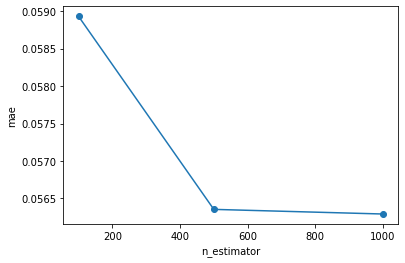

In [129]:
plt.plot(n_estimators,scores,'o-')
plt.ylabel("mae")
plt.xlabel("n_estimator")
print("best n_estimator {}".format(n_estimators[np.argmin(scores)]))

In [130]:
# max_depths
scores = []
max_depths = [1, 5, 7, 9]

for nes in max_depths:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=nes,
                      learning_rate=0.1,
                      n_estimators=1000,
                      min_child_samples=20,
                      n_jobs=-1)
    lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l1', early_stopping_rounds=5)
    y_pre = lgbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pre)
    scores.append(mae)
    print("test data mae eval : {}".format(mae))

[1]	valid_0's l1: 0.250716	valid_0's l2: 0.0838033
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.235682	valid_0's l2: 0.0748802
[3]	valid_0's l1: 0.222497	valid_0's l2: 0.0674394
[4]	valid_0's l1: 0.211305	valid_0's l2: 0.0613005
[5]	valid_0's l1: 0.201287	valid_0's l2: 0.0560712
[6]	valid_0's l1: 0.192191	valid_0's l2: 0.0515828
[7]	valid_0's l1: 0.184146	valid_0's l2: 0.0476339
[8]	valid_0's l1: 0.176875	valid_0's l2: 0.0443005
[9]	valid_0's l1: 0.170346	valid_0's l2: 0.0413388
[10]	valid_0's l1: 0.164532	valid_0's l2: 0.0387836
[11]	valid_0's l1: 0.159336	valid_0's l2: 0.036544
[12]	valid_0's l1: 0.154277	valid_0's l2: 0.0345283
[13]	valid_0's l1: 0.149727	valid_0's l2: 0.0328166
[14]	valid_0's l1: 0.145823	valid_0's l2: 0.0312634
[15]	valid_0's l1: 0.142262	valid_0's l2: 0.0299161
[16]	valid_0's l1: 0.13915	valid_0's l2: 0.0287304
[17]	valid_0's l1: 0.135804	valid_0's l2: 0.0276274
[18]	valid_0's l1: 0.133062	valid_0's l2: 0.0266501
[19]	valid_0's 

[162]	valid_0's l1: 0.0879497	valid_0's l2: 0.0146591
[163]	valid_0's l1: 0.0879453	valid_0's l2: 0.0146475
[164]	valid_0's l1: 0.0878757	valid_0's l2: 0.0146353
[165]	valid_0's l1: 0.0878722	valid_0's l2: 0.0146242
[166]	valid_0's l1: 0.087813	valid_0's l2: 0.0146121
[167]	valid_0's l1: 0.0877471	valid_0's l2: 0.014601
[168]	valid_0's l1: 0.0877426	valid_0's l2: 0.0145897
[169]	valid_0's l1: 0.0876783	valid_0's l2: 0.0145787
[170]	valid_0's l1: 0.0876574	valid_0's l2: 0.0145683
[171]	valid_0's l1: 0.0876067	valid_0's l2: 0.0145579
[172]	valid_0's l1: 0.0876024	valid_0's l2: 0.0145469
[173]	valid_0's l1: 0.0875494	valid_0's l2: 0.0145356
[174]	valid_0's l1: 0.0875256	valid_0's l2: 0.0145248
[175]	valid_0's l1: 0.0875174	valid_0's l2: 0.014515
[176]	valid_0's l1: 0.087426	valid_0's l2: 0.0145043
[177]	valid_0's l1: 0.08736	valid_0's l2: 0.0144945
[178]	valid_0's l1: 0.0873559	valid_0's l2: 0.0144844
[179]	valid_0's l1: 0.0872932	valid_0's l2: 0.0144734
[180]	valid_0's l1: 0.0872489	vali

[324]	valid_0's l1: 0.0840276	valid_0's l2: 0.013489
[325]	valid_0's l1: 0.0840275	valid_0's l2: 0.013484
[326]	valid_0's l1: 0.0840022	valid_0's l2: 0.0134789
[327]	valid_0's l1: 0.0840023	valid_0's l2: 0.0134742
[328]	valid_0's l1: 0.0839698	valid_0's l2: 0.0134691
[329]	valid_0's l1: 0.0839746	valid_0's l2: 0.0134647
[330]	valid_0's l1: 0.0839682	valid_0's l2: 0.0134603
[331]	valid_0's l1: 0.0839555	valid_0's l2: 0.0134565
[332]	valid_0's l1: 0.083935	valid_0's l2: 0.0134516
[333]	valid_0's l1: 0.0839348	valid_0's l2: 0.0134465
[334]	valid_0's l1: 0.0839015	valid_0's l2: 0.0134419
[335]	valid_0's l1: 0.0838799	valid_0's l2: 0.0134376
[336]	valid_0's l1: 0.0838808	valid_0's l2: 0.0134329
[337]	valid_0's l1: 0.0838473	valid_0's l2: 0.0134279
[338]	valid_0's l1: 0.0838526	valid_0's l2: 0.0134236
[339]	valid_0's l1: 0.0838317	valid_0's l2: 0.0134187
[340]	valid_0's l1: 0.083832	valid_0's l2: 0.0134138
[341]	valid_0's l1: 0.0838079	valid_0's l2: 0.0134091
[342]	valid_0's l1: 0.0838084	va

[484]	valid_0's l1: 0.0820003	valid_0's l2: 0.012841
[485]	valid_0's l1: 0.0819722	valid_0's l2: 0.0128374
[486]	valid_0's l1: 0.0819735	valid_0's l2: 0.0128339
[487]	valid_0's l1: 0.0819478	valid_0's l2: 0.0128302
[488]	valid_0's l1: 0.0819494	valid_0's l2: 0.0128265
[489]	valid_0's l1: 0.0819235	valid_0's l2: 0.012823
[490]	valid_0's l1: 0.081925	valid_0's l2: 0.0128196
[491]	valid_0's l1: 0.0818994	valid_0's l2: 0.012816
[492]	valid_0's l1: 0.0819036	valid_0's l2: 0.0128128
[493]	valid_0's l1: 0.0818881	valid_0's l2: 0.0128094
[494]	valid_0's l1: 0.0818892	valid_0's l2: 0.0128058
[495]	valid_0's l1: 0.0818649	valid_0's l2: 0.0128023
[496]	valid_0's l1: 0.0818663	valid_0's l2: 0.0127984
[497]	valid_0's l1: 0.0818421	valid_0's l2: 0.0127949
[498]	valid_0's l1: 0.0818441	valid_0's l2: 0.0127913
[499]	valid_0's l1: 0.0818184	valid_0's l2: 0.0127876
[500]	valid_0's l1: 0.0818202	valid_0's l2: 0.0127843
[501]	valid_0's l1: 0.0818013	valid_0's l2: 0.0127808
[502]	valid_0's l1: 0.0818057	va

[648]	valid_0's l1: 0.0804456	valid_0's l2: 0.012338
[649]	valid_0's l1: 0.0804292	valid_0's l2: 0.012335
[650]	valid_0's l1: 0.0804193	valid_0's l2: 0.0123328
[651]	valid_0's l1: 0.0804218	valid_0's l2: 0.0123303
[652]	valid_0's l1: 0.0803995	valid_0's l2: 0.0123273
[653]	valid_0's l1: 0.0804023	valid_0's l2: 0.0123246
[654]	valid_0's l1: 0.0803805	valid_0's l2: 0.0123218
[655]	valid_0's l1: 0.080369	valid_0's l2: 0.0123191
[656]	valid_0's l1: 0.0803709	valid_0's l2: 0.0123164
[657]	valid_0's l1: 0.0803752	valid_0's l2: 0.0123141
[658]	valid_0's l1: 0.0803535	valid_0's l2: 0.0123112
[659]	valid_0's l1: 0.0803556	valid_0's l2: 0.0123086
[660]	valid_0's l1: 0.0803383	valid_0's l2: 0.0123058
[661]	valid_0's l1: 0.0803407	valid_0's l2: 0.0123033
[662]	valid_0's l1: 0.0803194	valid_0's l2: 0.0123005
[663]	valid_0's l1: 0.0803222	valid_0's l2: 0.0122978
[664]	valid_0's l1: 0.0803017	valid_0's l2: 0.0122952
[665]	valid_0's l1: 0.0803042	valid_0's l2: 0.0122928
[666]	valid_0's l1: 0.0802826	v

[801]	valid_0's l1: 0.0792642	valid_0's l2: 0.0119691
[802]	valid_0's l1: 0.079267	valid_0's l2: 0.0119669
[803]	valid_0's l1: 0.0792565	valid_0's l2: 0.0119647
[804]	valid_0's l1: 0.0792597	valid_0's l2: 0.0119624
[805]	valid_0's l1: 0.0792411	valid_0's l2: 0.0119602
[806]	valid_0's l1: 0.0792438	valid_0's l2: 0.0119581
[807]	valid_0's l1: 0.0792258	valid_0's l2: 0.0119558
[808]	valid_0's l1: 0.0792301	valid_0's l2: 0.0119537
[809]	valid_0's l1: 0.0792218	valid_0's l2: 0.0119522
[810]	valid_0's l1: 0.0792008	valid_0's l2: 0.01195
[811]	valid_0's l1: 0.0791893	valid_0's l2: 0.0119482
[812]	valid_0's l1: 0.0791872	valid_0's l2: 0.0119464
[813]	valid_0's l1: 0.07919	valid_0's l2: 0.0119444
[814]	valid_0's l1: 0.079175	valid_0's l2: 0.011942
[815]	valid_0's l1: 0.0791778	valid_0's l2: 0.0119401
[816]	valid_0's l1: 0.0791592	valid_0's l2: 0.0119376
[817]	valid_0's l1: 0.0791625	valid_0's l2: 0.0119355
[818]	valid_0's l1: 0.0791443	valid_0's l2: 0.0119332
[819]	valid_0's l1: 0.0791475	valid

[968]	valid_0's l1: 0.0782347	valid_0's l2: 0.0116444
[969]	valid_0's l1: 0.0782374	valid_0's l2: 0.0116426
[970]	valid_0's l1: 0.0782218	valid_0's l2: 0.0116408
[971]	valid_0's l1: 0.0782246	valid_0's l2: 0.011639
[972]	valid_0's l1: 0.0782121	valid_0's l2: 0.0116372
[973]	valid_0's l1: 0.0782148	valid_0's l2: 0.0116355
[974]	valid_0's l1: 0.0781992	valid_0's l2: 0.0116337
[975]	valid_0's l1: 0.078202	valid_0's l2: 0.011632
[976]	valid_0's l1: 0.0781929	valid_0's l2: 0.0116304
[977]	valid_0's l1: 0.0781805	valid_0's l2: 0.0116286
[978]	valid_0's l1: 0.078185	valid_0's l2: 0.0116269
[979]	valid_0's l1: 0.0781678	valid_0's l2: 0.0116252
[980]	valid_0's l1: 0.0781604	valid_0's l2: 0.011624
[981]	valid_0's l1: 0.0781634	valid_0's l2: 0.0116224
[982]	valid_0's l1: 0.0781472	valid_0's l2: 0.0116203
[983]	valid_0's l1: 0.0781505	valid_0's l2: 0.0116185
[984]	valid_0's l1: 0.0781353	valid_0's l2: 0.0116168
[985]	valid_0's l1: 0.0781387	valid_0's l2: 0.011615
[986]	valid_0's l1: 0.0781225	vali

[116]	valid_0's l1: 0.0585067	valid_0's l2: 0.00679904
[117]	valid_0's l1: 0.0585005	valid_0's l2: 0.00679645
[118]	valid_0's l1: 0.0584887	valid_0's l2: 0.0067945
[119]	valid_0's l1: 0.0584742	valid_0's l2: 0.0067918
[120]	valid_0's l1: 0.058461	valid_0's l2: 0.0067889
[121]	valid_0's l1: 0.0584406	valid_0's l2: 0.00678453
[122]	valid_0's l1: 0.0584226	valid_0's l2: 0.00678105
[123]	valid_0's l1: 0.0583976	valid_0's l2: 0.00677476
[124]	valid_0's l1: 0.0583948	valid_0's l2: 0.0067725
[125]	valid_0's l1: 0.0583793	valid_0's l2: 0.00676935
[126]	valid_0's l1: 0.0583577	valid_0's l2: 0.00676397
[127]	valid_0's l1: 0.0583131	valid_0's l2: 0.00675185
[128]	valid_0's l1: 0.058293	valid_0's l2: 0.00674645
[129]	valid_0's l1: 0.0582793	valid_0's l2: 0.00673933
[130]	valid_0's l1: 0.0582685	valid_0's l2: 0.00673768
[131]	valid_0's l1: 0.058246	valid_0's l2: 0.00672967
[132]	valid_0's l1: 0.0582263	valid_0's l2: 0.0067265
[133]	valid_0's l1: 0.0582142	valid_0's l2: 0.00672477
[134]	valid_0's l1

[265]	valid_0's l1: 0.0570389	valid_0's l2: 0.00644689
[266]	valid_0's l1: 0.0570339	valid_0's l2: 0.00644595
[267]	valid_0's l1: 0.0570319	valid_0's l2: 0.00644554
[268]	valid_0's l1: 0.057028	valid_0's l2: 0.00644478
[269]	valid_0's l1: 0.0570252	valid_0's l2: 0.00644403
[270]	valid_0's l1: 0.0570223	valid_0's l2: 0.00644342
[271]	valid_0's l1: 0.0570205	valid_0's l2: 0.00644332
[272]	valid_0's l1: 0.0570136	valid_0's l2: 0.00644104
[273]	valid_0's l1: 0.0570127	valid_0's l2: 0.00644068
[274]	valid_0's l1: 0.0570034	valid_0's l2: 0.00643791
[275]	valid_0's l1: 0.0569998	valid_0's l2: 0.00643743
[276]	valid_0's l1: 0.056996	valid_0's l2: 0.00643695
[277]	valid_0's l1: 0.0569952	valid_0's l2: 0.00643646
[278]	valid_0's l1: 0.0569927	valid_0's l2: 0.00643593
[279]	valid_0's l1: 0.0569892	valid_0's l2: 0.00643543
[280]	valid_0's l1: 0.0569878	valid_0's l2: 0.00643468
[281]	valid_0's l1: 0.0569782	valid_0's l2: 0.00643244
[282]	valid_0's l1: 0.0569732	valid_0's l2: 0.00643161
[283]	valid_

[421]	valid_0's l1: 0.0565328	valid_0's l2: 0.0063441
[422]	valid_0's l1: 0.0565274	valid_0's l2: 0.00634301
[423]	valid_0's l1: 0.0565256	valid_0's l2: 0.00634229
[424]	valid_0's l1: 0.0565244	valid_0's l2: 0.00634213
[425]	valid_0's l1: 0.0565236	valid_0's l2: 0.00634188
[426]	valid_0's l1: 0.0565202	valid_0's l2: 0.00634103
[427]	valid_0's l1: 0.05652	valid_0's l2: 0.00634129
[428]	valid_0's l1: 0.056515	valid_0's l2: 0.00634028
[429]	valid_0's l1: 0.0565127	valid_0's l2: 0.00633982
[430]	valid_0's l1: 0.056511	valid_0's l2: 0.00633936
[431]	valid_0's l1: 0.0565093	valid_0's l2: 0.00633905
[432]	valid_0's l1: 0.0565084	valid_0's l2: 0.00633886
[433]	valid_0's l1: 0.0565078	valid_0's l2: 0.00633861
[434]	valid_0's l1: 0.056505	valid_0's l2: 0.00633804
[435]	valid_0's l1: 0.0565029	valid_0's l2: 0.00633792
[436]	valid_0's l1: 0.0565026	valid_0's l2: 0.00633851
[437]	valid_0's l1: 0.0565016	valid_0's l2: 0.00633843
[438]	valid_0's l1: 0.0564953	valid_0's l2: 0.00633732
[439]	valid_0's 

[13]	valid_0's l1: 0.104005	valid_0's l2: 0.0165585
[14]	valid_0's l1: 0.0991751	valid_0's l2: 0.0153251
[15]	valid_0's l1: 0.09467	valid_0's l2: 0.0142031
[16]	valid_0's l1: 0.0910318	valid_0's l2: 0.0133724
[17]	valid_0's l1: 0.0877282	valid_0's l2: 0.0126362
[18]	valid_0's l1: 0.0845676	valid_0's l2: 0.0119352
[19]	valid_0's l1: 0.0819462	valid_0's l2: 0.0113834
[20]	valid_0's l1: 0.0797913	valid_0's l2: 0.0109602
[21]	valid_0's l1: 0.0777946	valid_0's l2: 0.0105594
[22]	valid_0's l1: 0.0761222	valid_0's l2: 0.0102493
[23]	valid_0's l1: 0.0744151	valid_0's l2: 0.00988697
[24]	valid_0's l1: 0.0731337	valid_0's l2: 0.00966198
[25]	valid_0's l1: 0.0718476	valid_0's l2: 0.00939063
[26]	valid_0's l1: 0.0707779	valid_0's l2: 0.00919453
[27]	valid_0's l1: 0.0699306	valid_0's l2: 0.00904838
[28]	valid_0's l1: 0.0689172	valid_0's l2: 0.00884405
[29]	valid_0's l1: 0.0680929	valid_0's l2: 0.00869105
[30]	valid_0's l1: 0.0674936	valid_0's l2: 0.00859348
[31]	valid_0's l1: 0.0667879	valid_0's l2

[166]	valid_0's l1: 0.0572977	valid_0's l2: 0.00647801
[167]	valid_0's l1: 0.0572876	valid_0's l2: 0.00647575
[168]	valid_0's l1: 0.0572853	valid_0's l2: 0.00647426
[169]	valid_0's l1: 0.0572796	valid_0's l2: 0.00647331
[170]	valid_0's l1: 0.0572593	valid_0's l2: 0.00647099
[171]	valid_0's l1: 0.0572531	valid_0's l2: 0.00646986
[172]	valid_0's l1: 0.0572444	valid_0's l2: 0.00646799
[173]	valid_0's l1: 0.0572341	valid_0's l2: 0.00646542
[174]	valid_0's l1: 0.0572157	valid_0's l2: 0.00646163
[175]	valid_0's l1: 0.0572093	valid_0's l2: 0.00646035
[176]	valid_0's l1: 0.0571981	valid_0's l2: 0.006458
[177]	valid_0's l1: 0.0571893	valid_0's l2: 0.00645567
[178]	valid_0's l1: 0.0571874	valid_0's l2: 0.00645543
[179]	valid_0's l1: 0.0571703	valid_0's l2: 0.00645143
[180]	valid_0's l1: 0.0571489	valid_0's l2: 0.00644931
[181]	valid_0's l1: 0.0571344	valid_0's l2: 0.00644646
[182]	valid_0's l1: 0.0571234	valid_0's l2: 0.00644389
[183]	valid_0's l1: 0.0571136	valid_0's l2: 0.00644172
[184]	valid_

[323]	valid_0's l1: 0.0564957	valid_0's l2: 0.00631574
[324]	valid_0's l1: 0.0564938	valid_0's l2: 0.00631557
[325]	valid_0's l1: 0.0564927	valid_0's l2: 0.00631499
[326]	valid_0's l1: 0.056492	valid_0's l2: 0.00631491
[327]	valid_0's l1: 0.0564894	valid_0's l2: 0.00631364
[328]	valid_0's l1: 0.0564846	valid_0's l2: 0.00631272
[329]	valid_0's l1: 0.0564836	valid_0's l2: 0.00631254
[330]	valid_0's l1: 0.0564833	valid_0's l2: 0.0063125
[331]	valid_0's l1: 0.056476	valid_0's l2: 0.00631182
[332]	valid_0's l1: 0.0564747	valid_0's l2: 0.00631137
[333]	valid_0's l1: 0.0564745	valid_0's l2: 0.00631177
[334]	valid_0's l1: 0.056473	valid_0's l2: 0.00631146
[335]	valid_0's l1: 0.0564712	valid_0's l2: 0.0063112
[336]	valid_0's l1: 0.0564696	valid_0's l2: 0.00631058
[337]	valid_0's l1: 0.0564646	valid_0's l2: 0.00630934
[338]	valid_0's l1: 0.0564579	valid_0's l2: 0.00630843
[339]	valid_0's l1: 0.0564549	valid_0's l2: 0.00630803
[340]	valid_0's l1: 0.0564538	valid_0's l2: 0.00630781
[341]	valid_0's

[474]	valid_0's l1: 0.0561773	valid_0's l2: 0.00625977
[475]	valid_0's l1: 0.0561754	valid_0's l2: 0.0062594
[476]	valid_0's l1: 0.0561738	valid_0's l2: 0.00625904
[477]	valid_0's l1: 0.0561722	valid_0's l2: 0.00625883
[478]	valid_0's l1: 0.0561712	valid_0's l2: 0.00625854
[479]	valid_0's l1: 0.0561711	valid_0's l2: 0.00625858
[480]	valid_0's l1: 0.0561701	valid_0's l2: 0.00625823
[481]	valid_0's l1: 0.0561686	valid_0's l2: 0.00625794
[482]	valid_0's l1: 0.0561673	valid_0's l2: 0.00625774
[483]	valid_0's l1: 0.0561666	valid_0's l2: 0.00625766
[484]	valid_0's l1: 0.0561656	valid_0's l2: 0.0062571
[485]	valid_0's l1: 0.0561649	valid_0's l2: 0.00625699
[486]	valid_0's l1: 0.0561639	valid_0's l2: 0.00625681
[487]	valid_0's l1: 0.0561637	valid_0's l2: 0.00625651
[488]	valid_0's l1: 0.0561636	valid_0's l2: 0.0062561
[489]	valid_0's l1: 0.0561635	valid_0's l2: 0.00625619
[490]	valid_0's l1: 0.056162	valid_0's l2: 0.00625592
[491]	valid_0's l1: 0.056155	valid_0's l2: 0.00625505
[492]	valid_0's

[85]	valid_0's l1: 0.0585534	valid_0's l2: 0.00677172
[86]	valid_0's l1: 0.0585244	valid_0's l2: 0.00676512
[87]	valid_0's l1: 0.0584981	valid_0's l2: 0.00675862
[88]	valid_0's l1: 0.0584516	valid_0's l2: 0.00674919
[89]	valid_0's l1: 0.0584313	valid_0's l2: 0.00674329
[90]	valid_0's l1: 0.0583939	valid_0's l2: 0.00673439
[91]	valid_0's l1: 0.0583731	valid_0's l2: 0.00673034
[92]	valid_0's l1: 0.058337	valid_0's l2: 0.00672309
[93]	valid_0's l1: 0.0583027	valid_0's l2: 0.00671484
[94]	valid_0's l1: 0.0582848	valid_0's l2: 0.00671106
[95]	valid_0's l1: 0.0582545	valid_0's l2: 0.0067028
[96]	valid_0's l1: 0.0582148	valid_0's l2: 0.0066934
[97]	valid_0's l1: 0.0581927	valid_0's l2: 0.00668657
[98]	valid_0's l1: 0.0581718	valid_0's l2: 0.00668257
[99]	valid_0's l1: 0.0581515	valid_0's l2: 0.00667773
[100]	valid_0's l1: 0.0581306	valid_0's l2: 0.00667325
[101]	valid_0's l1: 0.0580979	valid_0's l2: 0.00666559
[102]	valid_0's l1: 0.0580728	valid_0's l2: 0.00666027
[103]	valid_0's l1: 0.058046

[234]	valid_0's l1: 0.0567338	valid_0's l2: 0.00637349
[235]	valid_0's l1: 0.0567325	valid_0's l2: 0.00637305
[236]	valid_0's l1: 0.05673	valid_0's l2: 0.00637252
[237]	valid_0's l1: 0.0567294	valid_0's l2: 0.00637265
[238]	valid_0's l1: 0.0567248	valid_0's l2: 0.00637191
[239]	valid_0's l1: 0.056718	valid_0's l2: 0.00637073
[240]	valid_0's l1: 0.0567167	valid_0's l2: 0.00637035
[241]	valid_0's l1: 0.0567122	valid_0's l2: 0.00636898
[242]	valid_0's l1: 0.0567027	valid_0's l2: 0.00636786
[243]	valid_0's l1: 0.0566936	valid_0's l2: 0.0063663
[244]	valid_0's l1: 0.056687	valid_0's l2: 0.00636556
[245]	valid_0's l1: 0.0566865	valid_0's l2: 0.0063657
[246]	valid_0's l1: 0.0566854	valid_0's l2: 0.00636544
[247]	valid_0's l1: 0.0566828	valid_0's l2: 0.0063648
[248]	valid_0's l1: 0.0566802	valid_0's l2: 0.00636385
[249]	valid_0's l1: 0.056679	valid_0's l2: 0.00636351
[250]	valid_0's l1: 0.0566762	valid_0's l2: 0.00636312
[251]	valid_0's l1: 0.0566692	valid_0's l2: 0.00636236
[252]	valid_0's l1

[385]	valid_0's l1: 0.0562515	valid_0's l2: 0.00628795
[386]	valid_0's l1: 0.0562517	valid_0's l2: 0.00628816
[387]	valid_0's l1: 0.0562507	valid_0's l2: 0.00628805
[388]	valid_0's l1: 0.0562435	valid_0's l2: 0.00628704
[389]	valid_0's l1: 0.0562432	valid_0's l2: 0.00628707
[390]	valid_0's l1: 0.0562424	valid_0's l2: 0.00628705
[391]	valid_0's l1: 0.0562414	valid_0's l2: 0.00628682
[392]	valid_0's l1: 0.0562417	valid_0's l2: 0.00628702
[393]	valid_0's l1: 0.05624	valid_0's l2: 0.00628665
[394]	valid_0's l1: 0.056238	valid_0's l2: 0.00628636
[395]	valid_0's l1: 0.0562365	valid_0's l2: 0.00628616
[396]	valid_0's l1: 0.0562372	valid_0's l2: 0.00628626
[397]	valid_0's l1: 0.0562347	valid_0's l2: 0.00628567
[398]	valid_0's l1: 0.0562287	valid_0's l2: 0.00628453
[399]	valid_0's l1: 0.0562281	valid_0's l2: 0.00628413
[400]	valid_0's l1: 0.0562262	valid_0's l2: 0.00628367
[401]	valid_0's l1: 0.0562248	valid_0's l2: 0.00628361
[402]	valid_0's l1: 0.056224	valid_0's l2: 0.00628301
[403]	valid_0'

test data mae eval : 0.056028658468003166


In [132]:
scores

[0.07804793761050882,
 0.05629309509576155,
 0.05607324820152828,
 0.056028658468003166]

In [133]:
lgbm.score(X_valid, y_valid)

0.934053846169471

best max_depths 9


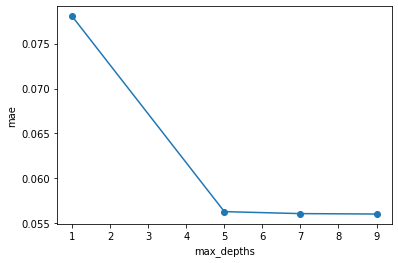

In [134]:
plt.plot(max_depths,scores,'o-')
plt.ylabel("mae")
plt.xlabel("max_depths")
print("best max_depths {}".format(max_depths[np.argmin(scores)]))